<a href="https://colab.research.google.com/github/Jyoti-Sama/weather-prediction-model/blob/main/load_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
model_path = "/content/drive/MyDrive/colab/Model_no_2"
sequential_model_path = "/content/drive/MyDrive/colab/Model_no_3"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
model = tf.keras.models.load_model(model_path)

In [25]:
model_sq = tf.keras.models.load_model(sequential_model_path)

In [8]:
dataset_folder = '/content/drive/MyDrive/colab/Interview dataset-Weather Prediction'

train_img_dir = dataset_folder + '/Train'
test_img_dir = dataset_folder + '/Test'


In [9]:
import numpy as np
from PIL import Image

In [10]:
def predict_img(image_path):
  image = Image.open(image_path)
  image = image.resize((64, 64))  # Resize the image to match the model's input size
  image = np.array(image) / 255.0  # Normalize the image pixel values

  # Expand dimensions to create a batch of size 1
  image = np.expand_dims(image, axis=0)

  # Make the prediction
  predictions = model.predict(image)
  return predictions

In [26]:
def predict_img_sequential(image_path):
  image = Image.open(image_path)
  image = image.resize((64, 64))  # Resize the image to match the model's input size
  image = np.array(image) / 255.0  # Normalize the image pixel values

  # Expand dimensions to create a batch of size 1
  image = np.expand_dims(image, axis=0)

  # Make the prediction
  predictions = model_sq.predict(image)
  return predictions

In [ ]:
# Make predictions on the test images
# predictions = model.predict(test_generator)

In [11]:
class_labels = ['cloudy', 'desert', 'green_area', 'water']  # Replace with your actual class labels

In [12]:
rand_green_area_img = train_img_dir + '/green_area/Forest_638.jpg'
rand_water_img = test_img_dir + '/water/SeaLake_2974.jpg'
rand_cloudy_img = test_img_dir + '/cloudy/train_40041.jpg'
rand_desert_img = test_img_dir + '/desert/desert(1081).jpg'

In [13]:
def display_prediction(predictions):
  # Interpret the predictions
  predicted_class_index = np.argmax(predictions[0])
  predicted_class_label = class_labels[predicted_class_index]
  predicted_probabilities = predictions[0]

  # Print the predicted class or probabilities
  print(f"Predicted Class: {predicted_class_label}")
  print("Predicted Probabilities:")
  for class_label, probability in zip(class_labels, predicted_probabilities):
    print(f"  {class_label}: {probability:.4f}")

In [ ]:
display_prediction(predict_img(rand_cloudy_img))

In [18]:
import cv2 as cv
import matplotlib.pyplot as plt

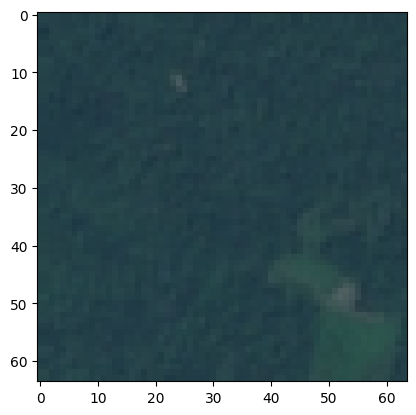

In [19]:
img = cv.imread(rand_green_area_img)
img_cvt=cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [14]:
display_prediction(predict_img(rand_green_area_img))

1/1 [==============================] - 0s 428ms/step
Predicted Class: green_area
Predicted Probabilities:
  cloudy: 0.0000
  desert: 0.0000
  green_area: 0.9997
  water: 0.0003


In [27]:
display_prediction(predict_img_sequential(rand_green_area_img))

1/1 [==============================] - 0s 235ms/step
Predicted Class: cloudy
Predicted Probabilities:
  cloudy: 0.2503
  desert: 0.2498
  green_area: 0.2500
  water: 0.2499


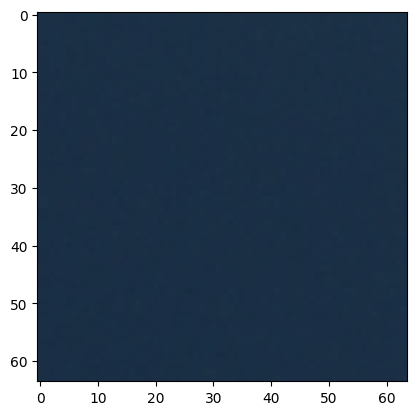

In [20]:
img = cv.imread(rand_water_img)
img_cvt=cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [15]:
display_prediction(predict_img(rand_water_img))

1/1 [==============================] - 0s 67ms/step
Predicted Class: water
Predicted Probabilities:
  cloudy: 0.0001
  desert: 0.0000
  green_area: 0.0025
  water: 0.9974


In [28]:
display_prediction(predict_img_sequential(rand_water_img))

1/1 [==============================] - 0s 88ms/step
Predicted Class: cloudy
Predicted Probabilities:
  cloudy: 0.2503
  desert: 0.2498
  green_area: 0.2500
  water: 0.2499


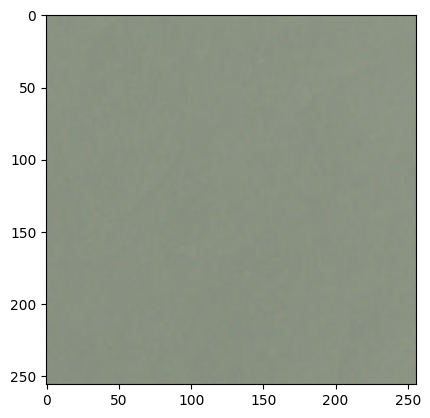

In [21]:
img = cv.imread(rand_cloudy_img)
img_cvt=cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

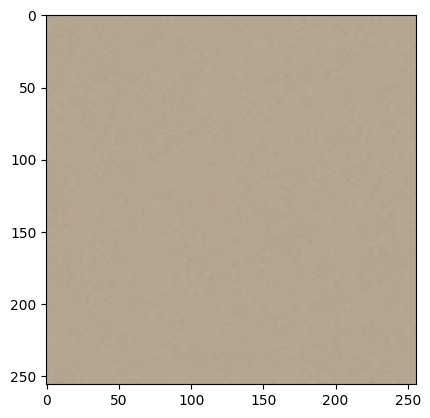

In [22]:
img = cv.imread(rand_desert_img)
img_cvt=cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [17]:
display_prediction(predict_img(rand_desert_img))

1/1 [==============================] - 0s 69ms/step
Predicted Class: cloudy
Predicted Probabilities:
  cloudy: 0.9993
  desert: 0.0007
  green_area: 0.0000
  water: 0.0000


In [29]:
display_prediction(predict_img_sequential(rand_desert_img))

1/1 [==============================] - 0s 84ms/step
Predicted Class: cloudy
Predicted Probabilities:
  cloudy: 0.2503
  desert: 0.2498
  green_area: 0.2500
  water: 0.2499
